In [1]:
import numpy as np
import pandas as pd
import csv
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
#from IPython.display import display

In [2]:
plt.rcParams["figure.figsize"] = (10, 8)
plt.rcParams.update({'font.size': 14})
plt.rcParams["font.family"] = "serif"

# Import datasets

In [3]:
#cosmic dataset containing CDS+AA mutations and their type
GMs = pd.read_csv('./data/cosmic-variants.csv', sep=',')
print(GMs.shape)
#cosmic datasets containing CDS+AA mutations and involved tissues
cosmic = pd.read_csv('./data/cosmic-gm.csv', sep=',')
print(cosmic.shape)

#biomuta dataset containing altered nucleotides+aa and cancer type
BM = pd.read_csv('./data/biomuta.csv', sep=',')
print(BM.shape)

#disgenet dataset containing diseases and number of genes associated to it
GDAs = pd.read_csv('./data/113130_gene_gda_summary.tsv', sep='\t')
print(GDAs.shape)

#oncomx dataset containing the frequency for different cancer types
OMX = pd.read_csv('./data/OncoMX.csv', sep=',')
print(OMX.shape)

#bioxpress dataset containing the pertcentage of patients affected by cancer types
BX = pd.read_csv('./data/de-2023-06-01-04-35-57.csv', sep=',')
BX['Subjects Pctgs'] = [98.28, 94.74, 93.75, 3.85, 52.63, 95.35, 96.0, 100.0, 92.31, 90.28, 98.04, 100.0, 72.88, 93.75]
print(BX.shape)
#bioxpress dataset for the expression profile in human tissues
BX2 = pd.read_csv('./data/bgee-2023-06-01-04-45-24.csv', sep=',')


(136, 6)
(148, 19)
(38, 15)
(105, 16)
(12, 13)
(14, 9)


# Cancer affected tissues

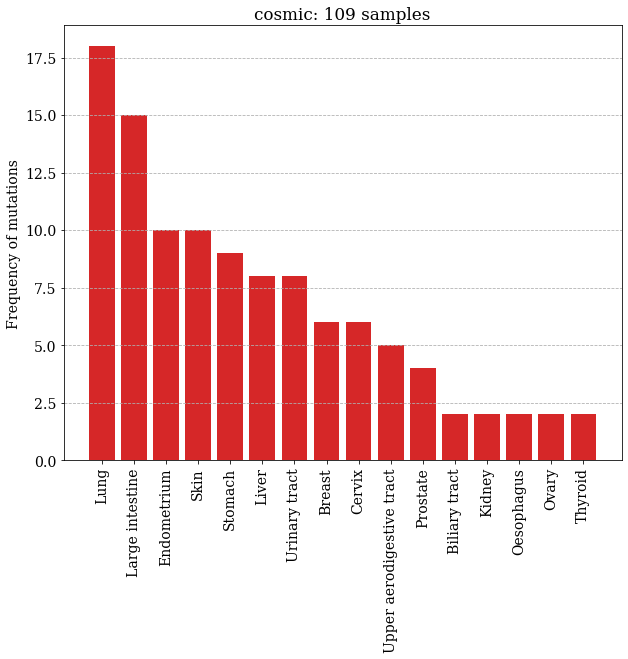

In [4]:
###cosmic###
#carc = cosmic.copy()
carc = cosmic[cosmic['Histology']=='Carcinoma']
cosmic_rows = carc.shape[0]
carc_sum = carc.groupby('Primary Tissue')['Histology'].count().reset_index()
carc_ord = carc_sum.sort_values('Histology', ascending=False)
plt.bar(carc_ord['Primary Tissue'], height=carc_ord['Histology'], width=0.8, color='tab:red')
#plt.hist(carc['Primary Tissue'], bins=len(carc['Primary Tissue']), width=0.7)
plt.xticks(rotation=90)
plt.title('cosmic: '+str(cosmic_rows)+' samples')
plt.ylabel('Frequency of mutations')
plt.grid(axis='y', ls='--')
plt.show()

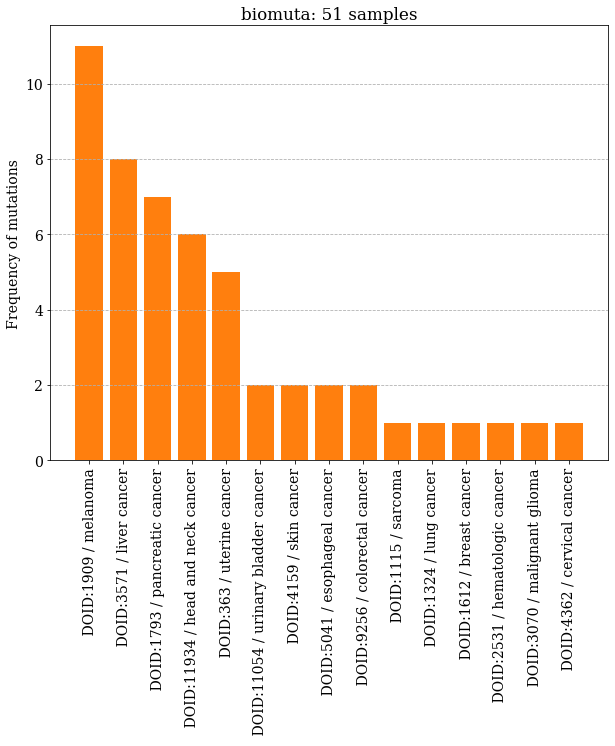

In [5]:
###biomuta###
biomuta_rows = BM['Frequency'].sum()
probs0 = [BM['Functional predictions'][i].split("=",1)[1] for i in range(len(BM))]
probs1 = [probs0[i][1:-1] for i in range(len(probs0))]
probs = [float(probs1[i]) for i in range(len(probs1))]
func_prob = dict((BM['Cancer Type'][i],probs[i]) for i in range(len(BM)))
df3 = BM.groupby('Cancer Type')['Frequency'].sum().reset_index()
df3 = df3.sort_values('Frequency', ascending=False)
#cmap = plt.cm.viridis
#plt.bar(df3['Cancer Type'], height=df3['Frequency'], width=0.8, color=cmap(probs))
#plt.colorbar()
plt.bar(df3['Cancer Type'], height=df3['Frequency'], width=0.8, color='tab:orange')
plt.xticks(rotation=90)
plt.title('biomuta: '+str(biomuta_rows)+' samples')
plt.ylabel('Frequency of mutations')
plt.grid(axis='y', ls='--')
plt.show()

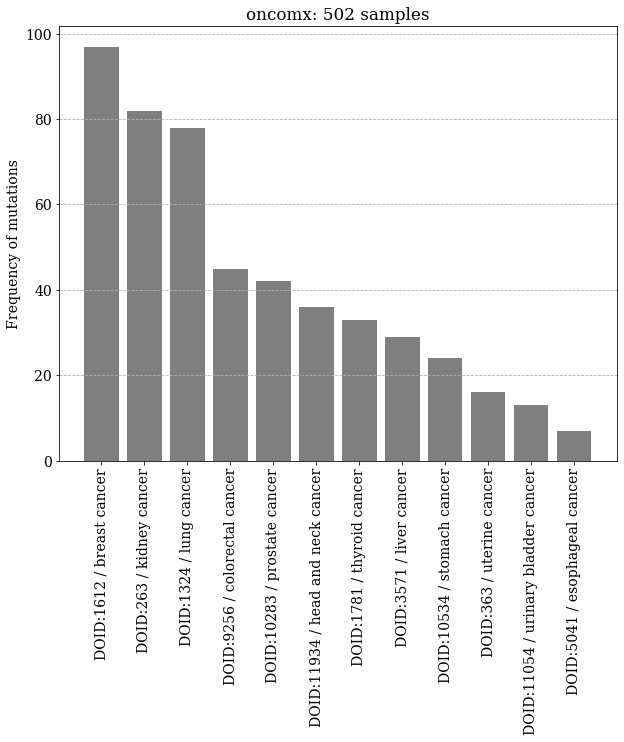

In [6]:
###oncomx###
omx_rows = OMX['Patient Freq.'].sum()
omx_ord = OMX.sort_values('Patient Freq.', ascending=False)
plt.bar(omx_ord['Cancer Type'], height=omx_ord['Patient Freq.'], width=0.8, color='tab:grey')
plt.xticks(rotation=90)
plt.title('oncomx: '+str(omx_rows)+' samples')
plt.ylabel('Frequency of mutations')
plt.grid(axis='y', ls='--')
plt.show()

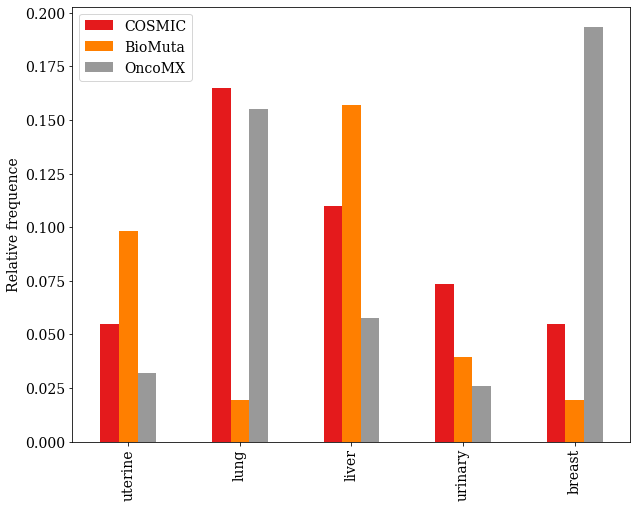

In [32]:
#cancer frequencies comparison plot
tot_df = pd.DataFrame({
    'COSMIC' : [i/cosmic_rows for i in [6, 18, 12, 8, 6]],
    'BioMuta' : [j/biomuta_rows for j in [5, 1, 8, 2, 1]],
    'OncoMX' : [k/omx_rows for k in [16, 78, 29, 13, 97]]
    },index = ['uterine', 'lung', 'liver', 'urinary', 'breast']
)

tot_df.plot(kind='bar', colormap='Set1')
plt.ylabel('Relative frequence')
plt.show()

# Mutation landscape

    Position CDS Mutation AA Mutation Legacy Mutation ID  Count  \
74     212.0     c.635C>T     p.P212L        COSM3451687      2   
75     212.0     c.636C>A     p.P212=        COSM7728558      1   
76     212.0     c.636C>T     p.P212=        COSM9107323      1   

                            Type  
74       Substitution - Missense  
75  Substitution - coding silent  
76  Substitution - coding silent  


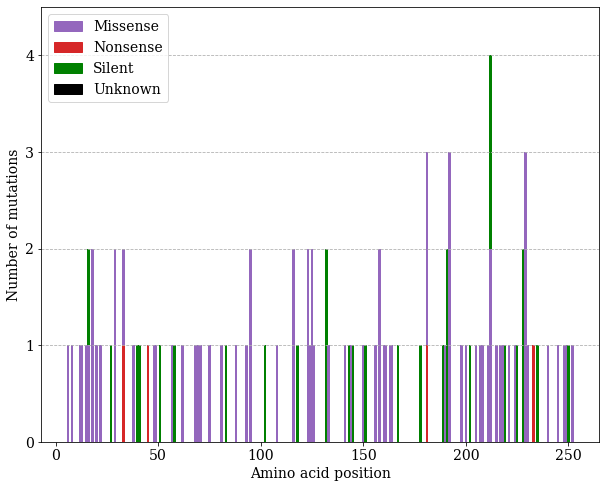

In [8]:
###cosmic###
#subs_dct = {'position':[k+1 for k in range(l)], 'count':[0]*l}
#subs_count = GMs.groupby('Position').sum()
#plt.plot(subs_count)
print(GMs[GMs['Position']==212])

color_dict = {'Substitution - Missense':'tab:purple',
              'Substitution - Nonsense':'tab:red',
              'Substitution - coding silent':'green',
              'Unknown':'k'}

import matplotlib.patches as mpatches

prev_row = GMs.iloc[-1]

for idx,row in GMs.iterrows():
    if row['Position']==prev_row['Position']:
        if row['Position']==212:
            plt.bar(row['Position'], row['Count'], bottom=prev_row['Count']+1, width=1.25, color=color_dict[row['Type']])
        else:
            plt.bar(row['Position'], row['Count'], bottom=prev_row['Count'], width=1.25, color=color_dict[row['Type']])
    else:
        plt.bar(row['Position'], row['Count'], width=1.25, color=color_dict[row['Type']])
        
    prev_row = row
    
miss = mpatches.Patch(color='tab:purple', label='Missense')
nons = mpatches.Patch(color='tab:red', label='Nonsense')
silent = mpatches.Patch(color='green', label='Silent')
unkn = mpatches.Patch(color='k', label='Unknown')
plt.ylim(0,4.5)
plt.yticks(range(5))
plt.legend(handles=[miss, nons, silent, unkn], loc='upper left')
plt.xlabel('Amino acid position')
plt.ylabel('Number of mutations')
plt.grid(axis='y', ls='--')
plt.show()


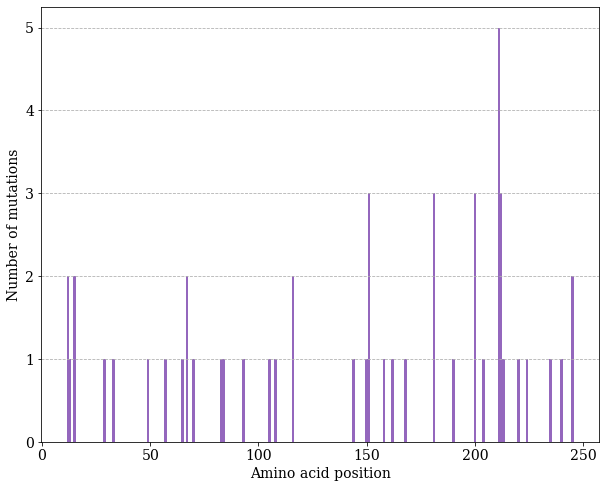

In [9]:
#df3 = BM.groupby('Cancer Type')['Frequency'].sum().reset_index()
#df3 = df3.sort_values('Frequency', ascending=False)
#cols = ['red','blue','orange','green','violet','grey','grey','grey','grey','grey','grey','grey','grey','grey','grey']
#type_col = dict((df3['Cancer Type'][i],cols[i]) for i in range(15))

#biomuta mutation landscape colored by top 5 cancer types
df2 = BM.groupby('Protein Position')['Frequency'].sum().reset_index()
plt.bar(df2['Protein Position'], height=df2['Frequency'], width=1.25, color='tab:purple')
plt.xlabel('Amino acid position')
plt.ylabel('Number of mutations')
plt.grid(axis='y', ls='--')
plt.show()


# Nucleotides and amino acids mutations

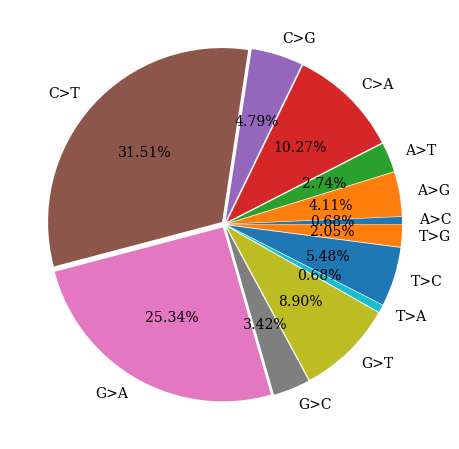

dict_values([1, 6, 4, 15, 7, 46, 37, 5, 13, 1, 8, 3])
146


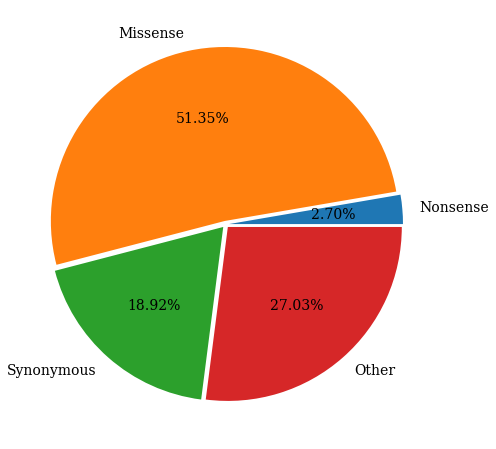

In [10]:
#substitution mutations distribution
bases = ['A', 'C', 'G', 'T']
changes = [i+'>'+j for i in bases for j in bases if i!=j]
changes_dict = dict((ch, 0) for ch in changes)
for row in cosmic['CDS Mutation']:
    for ch in changes_dict.keys():
        if ch in row:
            changes_dict[ch] += 1
            
plt.pie(changes_dict.values(), labels=changes_dict.keys(), autopct='%1.2f%%', explode=[0.02]*len(changes))
plt.show()
print(changes_dict.values())
print(sum(changes_dict.values()))

#mutation types distribution
types = ['Nonsense', 'Missense', 'Synonymous', 'Other']
types_dict = dict((t, 0) for t in types)
for row in cosmic['AA Mutation']:
    if '*' in row: types_dict['Nonsense'] += 1
    if '=' in row: types_dict['Synonymous'] += 1
    if '?' in row: types_dict['Other'] += 1
types_dict['Missense'] = len(cosmic) - sum(types_dict.values())

plt.pie(types_dict.values(), labels=types_dict.keys(), autopct='%1.2f%%', explode=[0.02]*4)
plt.show()

In [11]:
cosmic.iloc[0:6,5:8]

,AA Mutation,CDS Mutation,Primary Tissue
0,p.?,c.*1552C>T,Ovary
1,p.?,c.*1080C>T,Large intestine
2,p.?,c.*1059G>T,Ovary
3,p.?,c.*1038G>T,Skin
4,p.?,c.*669T>A,Kidney
5,p.?,c.*604A>G,Liver


(104, 19)
(1, 19)
(104, 19)
{'polar>polar': 35, 'polar>positive': 16, 'polar>negative': 5, 'polar>non-polar': 23, 'polar>aromatic': 8, 'polar>bulky': 14, 'polar>special': 6, 'positive>polar': 11, 'positive>positive': 6, 'positive>negative': 1, 'positive>non-polar': 5, 'positive>aromatic': 0, 'positive>bulky': 0, 'positive>special': 1, 'negative>polar': 14, 'negative>positive': 7, 'negative>negative': 4, 'negative>non-polar': 1, 'negative>aromatic': 0, 'negative>bulky': 1, 'negative>special': 1, 'non-polar>polar': 14, 'non-polar>positive': 4, 'non-polar>negative': 0, 'non-polar>non-polar': 25, 'non-polar>aromatic': 2, 'non-polar>bulky': 16, 'non-polar>special': 5, 'aromatic>polar': 0, 'aromatic>positive': 0, 'aromatic>negative': 0, 'aromatic>non-polar': 0, 'aromatic>aromatic': 0, 'aromatic>bulky': 0, 'aromatic>special': 0, 'bulky>polar': 6, 'bulky>positive': 1, 'bulky>negative': 0, 'bulky>non-polar': 9, 'bulky>aromatic': 0, 'bulky>bulky': 13, 'bulky>special': 0, 'special>polar': 14, 'sp

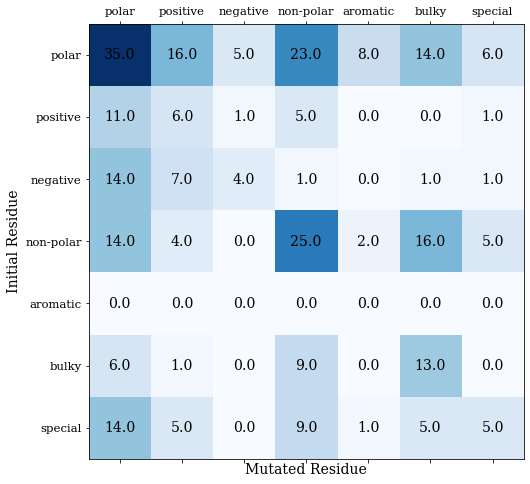

In [33]:
cosmic = pd.read_csv('./data/COSMIC.csv', sep=',')

#AA changes distribution
AA_clust = {'G':['special'],
            'A':['non-polar'],
            'C':['special','non-polar'],
            'S':['polar'],
            'P':['special','non-polar'],
            'V':['bulky','non-polar'],
            'T':['bulky','polar'],
            'M':['non-polar'],
            'L':['non-polar'],
            'I':['bulky','non-polar'],
            'N':['polar'],
            'D':['negative','polar'],
            'Q':['polar'],
            'E':['negative','polar'],
            'K':['positive','polar'],
            'F':['aromatic','bulky','non-polar'],
            'H':['positive','polar'],
            'R':['positive','polar'],
            'Y':['aromatic','bulky','non-polar'],
            'W':['aromatic','bulky','non-polar']}
fams = ['polar','positive','negative','non-polar','aromatic','bulky','special']
fam_clust = {'polar':['D','E','H','K','R','S','T','N','Q'],
            'positive':['H','K','R'],
            'negative':['D','E'],
            'non-polar':['A','C','P','V','M','L','I','F','Y','W'],
            'aromatic':['F','Y','W'],
            'bulky':['V','T','I','F','Y','W'],
            'special':['G','C','P']}
fams_chng = [i+'>'+j for i in fam_clust.keys() for j in fam_clust.keys()]
changes = dict((fc, 0) for fc in fams_chng)

cosmic = cosmic[cosmic['AA Mutation']!='p.?']
cosmic = cosmic[cosmic['AA Mutation'].str[-1:]!='*']
print(cosmic[cosmic['AA Mutation']!='p.?'].shape)
print(cosmic[cosmic['AA Mutation']=='p.A12G'].shape)
print(cosmic.shape)

for row in cosmic['AA Mutation']:
    AA_ini = row[2]
    AA_fin = row[-1]
    fam_ini = AA_clust[AA_ini]
    if AA_fin=='=': fam_fin=fam_ini
    else: fam_fin = AA_clust[AA_fin]
    for fi in fam_ini:
        for ff in fam_fin:
            changes[fi+'>'+ff]+=1

print(changes)
result = changes.values()
data = list(result)
numpyArray = np.array(data)
M = np.reshape(numpyArray, (len(fams),len(fams)))

labels = fams
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(M, cmap='Blues')
#fig.colorbar(cax)
for (i, j), z in np.ndenumerate(M):
    ax.text(j, i, '{:0.1f}'.format(z), ha='center', va='center')
ax.set_xticklabels([''] + labels, size='small')
ax.set_yticklabels([''] + labels, size='small')
plt.xlabel('Mutated Residue')
plt.ylabel('Initial Residue')
plt.show()

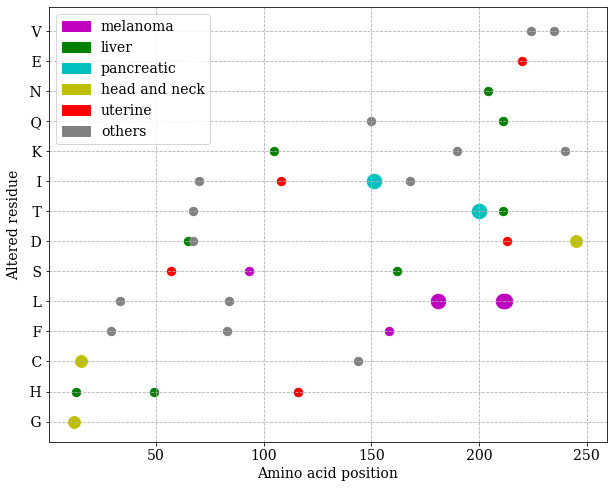

In [13]:
###biomuta###
df4 = df3.sort_values('Frequency', ascending=False).reset_index()
types = df4['Cancer Type']
cols = ['m','g','c','y','r']
col_canc = dict((types[i],cols[i]) for i in range(len(cols)))

for row in BM.iterrows():
    pos = row[1]['Protein Position']
    alt = row[1]['Alt Residue']
    freq = row[1]['Frequency']
    if row[1]['Cancer Type'] not in col_canc.keys():
        col = 'grey'
    else:
        col = col_canc[row[1]['Cancer Type']]
    plt.scatter(x=pos, y=alt, color=col, s=70*freq, label=row[1]['Cancer Type'])

c1 = mpatches.Patch(color='m', label='melanoma')
c2 = mpatches.Patch(color='g', label='liver')
c3 = mpatches.Patch(color='c', label='pancreatic')
c4 = mpatches.Patch(color='y', label='head and neck')
c5 = mpatches.Patch(color='r', label='uterine')
c6 = mpatches.Patch(color='grey', label='others')
plt.legend(handles=[c1, c2, c3, c4, c5, c6], loc='upper left')
plt.xlabel('Amino acid position')
plt.ylabel('Altered residue')
plt.grid(ls='--')
plt.show()    

# Other plots

37


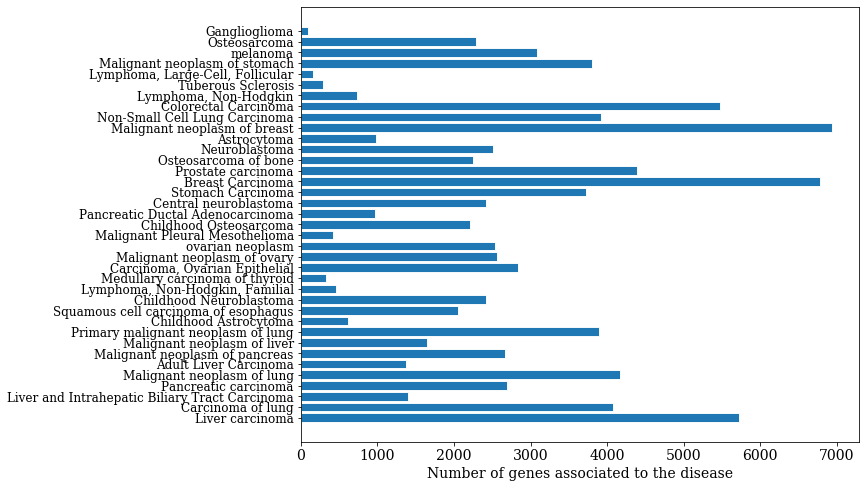

In [25]:
###disgenet###
#GDAs restricted to cancers (neoplasms)
GDAs = GDAs[GDAs['Type']=='disease']
mask = GDAs['Disease_Class'].str.contains('Neoplasms', case=False, na=False)
#mask = GDAs['Disease_Class'].isin(['Neoplasms'])
#GDAs = GDAs[mask]
print(len(GDAs))
plt.barh(range(len(GDAs['Disease'])), GDAs['N_genes_d'], align='center', linewidth=0.9, edgecolor='w')
plt.yticks(range(len(GDAs['Disease'])), labels=GDAs['Disease'], fontsize=12)
plt.xlabel('Number of genes associated to the disease')
#plt.title('disgenet')
plt.show()

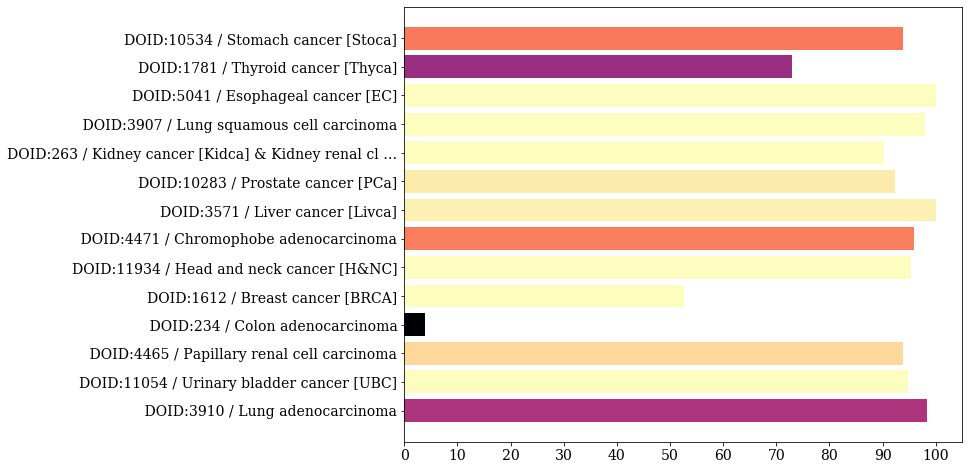

In [15]:
###bioxpress###
cmap = plt.cm.magma
plt.barh(range(len(BX['Subjects Ratio'])), BX['Subjects Pctgs'], align='center', color=cmap(BX['log2FC']))
plt.yticks(range(len(BX['Cancer Type'])), labels=BX['Cancer Type'])
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

['HsapDv:0000087' 'HsapDv:0000088' 'HsapDv:0000089' 'HsapDv:0000090'
 'HsapDv:0000091' 'HsapDv:0000092' 'HsapDv:0000094']


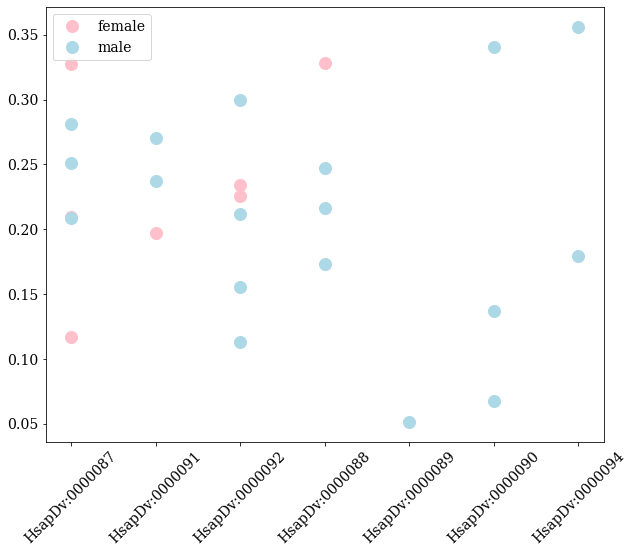

In [16]:
###bioxpress###
print(np.unique(BX2['uberonDevelopmentId']))
colors = {"female": "pink", "male": "lightblue",}
for name, group in BX2.groupby('sex'):
    plt.plot(group['uberonDevelopmentId'], group['expressionScore'], 
             marker='o', linestyle='', markersize=12, label=name, color=colors[name])
plt.legend()
plt.xticks(rotation = 45)
plt.show()

# Properties derived from primary sturcure

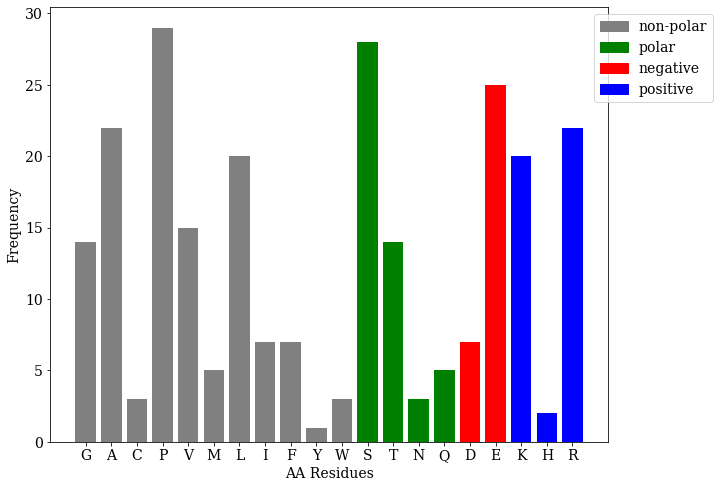

In [31]:
#primary structure amino acid families

with open('./data/Q96FF9_seq_only.fasta', 'r') as file:
    seq_str = file.read().replace('\n', '')
seq_list = list(seq_str)
res_count = dict((res,0) for res in seq_list)
for res in seq_list:
    res_count[res] += 1    

fam_polarity_col = {'G':'grey','A':'grey','C':'grey','S':'green', 'P':'grey','V':'grey','T':'green','M':'grey',
                    'L':'grey','I':'grey','N':'green','D':'red','Q':'green','E':'red','K':'blue','F':'grey',
                    'H':'blue','R':'blue','Y':'grey','W':'grey'}

amino_acids = ['G','A','C','P','V','M','L','I','F','Y','W','S','T','N','Q','D','E','K','H','R']
for aa in amino_acids:
    plt.bar(x=aa, height=res_count[aa], color=fam_polarity_col[aa])

n_p = mpatches.Patch(color='grey', label='non-polar')
pol = mpatches.Patch(color='green', label='polar')
neg = mpatches.Patch(color='r', label='negative')
pos = mpatches.Patch(color='b', label='positive')

plt.xlabel('AA Residues')
plt.ylabel('Frequency')
plt.legend(handles=[n_p, pol, neg, pos], loc='best', bbox_to_anchor=(0.7, 0.5, 0.5, 0.5))    
plt.show()

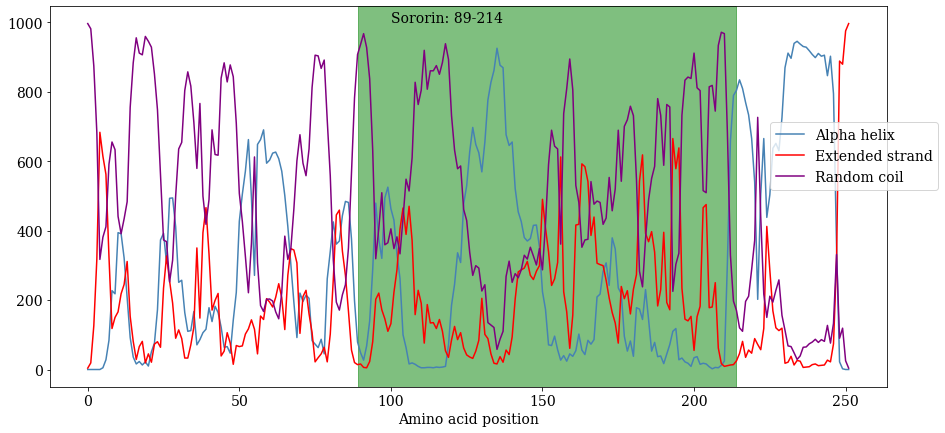

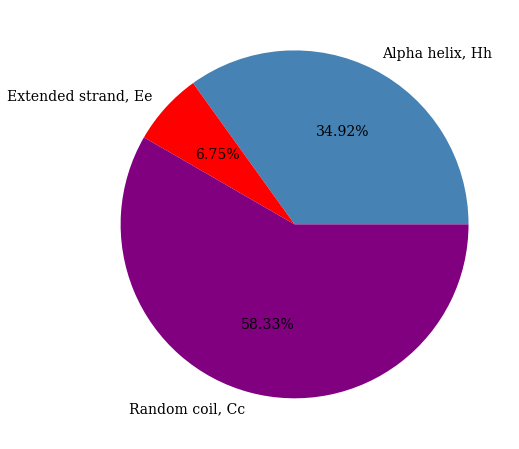

In [18]:
# GOR4 prediction for secondary structure
data = []
seq2nd = []

with open('./data/gor4-UNK_53660.txt', newline='\n') as f:
    reader = csv.reader(f, delimiter=' ')
    for row in reader:
        while '' in row:
            row.remove('')
        data.append(np.array(row[1:4]).astype(np.float32))
        seq2nd.append(np.array(row[0]))
        
gor4_df = pd.DataFrame(data, columns=['h', 's', 'c'])
gor4_df

fig, ax = plt.subplots(figsize=(15,7))

ax.plot(gor4_df['h'], label='Alpha helix', color='steelblue')
ax.plot(gor4_df['s'], label='Extended strand', color='red')
ax.plot(gor4_df['c'], label='Random coil', color='purple')
ax.axvspan(89, 214, color='green', alpha=0.5) #source:pfam

sram = mpatches.Patch(color='grey', label='Sororin')
ax.legend(loc='best', bbox_to_anchor=(0.57, 0.5, 0.5, 0.5))
ax.text(100, 1000, 'Sororin: 89-214')
ax.set_xlabel('Amino acid position')

plt.show()


fig, ax = plt.subplots()
with open('./data/gor4-UNK_53660.txt', newline='\n') as f:
    lines = f.readlines()

n_h, n_s, n_c = 0, 0, 0
for i in range(len(lines)):
    if lines[i][0]=='H': n_h +=1
    elif lines[i][0]=='E': n_s +=1
    elif lines[i][0]=='C': n_c +=1
        
labels = ['Alpha helix, Hh', 'Extended strand, Ee', 'Random coil, Cc']
sizes = [n_h, n_s, n_c]
ax.pie(sizes, labels=labels, colors=['steelblue', 'red', 'purple'], autopct='%1.2f%%')
plt.show()

/home/matteo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/matteo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
/home/matteo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warnin

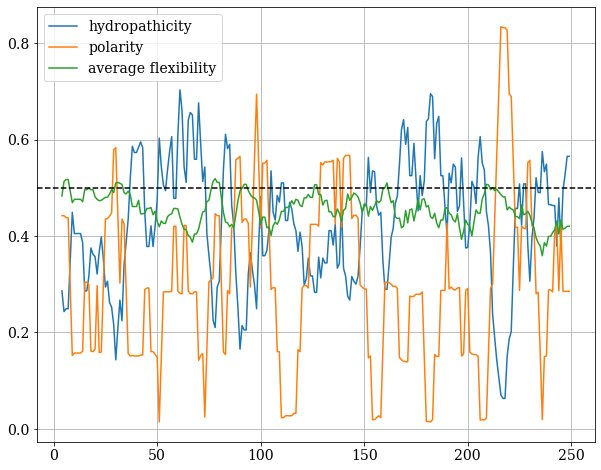

In [19]:
#expasy protscale properties

KD = pd.read_csv('./data/KD_hydropath.txt', sep='    ', names=['pos', 'hydr_norm'])
#BK = pd.read_csv('./data/bulkiness.txt', sep='    ', names=['pos', 'bulkiness'])
PO = pd.read_csv('./data/polarity.txt', sep='    ', names=['pos', 'polarity'])
#DI = pd.read_csv('./data/long_disorder.txt', sep='\t', names=['pos', 'aa', 'iupred_score', 'exp_dis'])
FL = pd.read_csv('./data/flex.txt', sep='    ', names=['pos', 'avg_flex'])

plt.plot(KD['pos'], KD['hydr_norm'], label='hydropathicity')
#plt.plot(BK['pos'], BK['bulkiness'], label='bulkiness')
plt.plot(PO['pos'], PO['polarity'], label='polarity')
#plt.plot(DI['pos'], DI['iupred_score'], label='disorder', color='red')
plt.plot(FL['pos'], FL['avg_flex'], label='average flexibility')
plt.axhline(y=0.5, color='k', ls='--')

#plt.ylim(0,1)
plt.legend()
plt.grid()
plt.show()

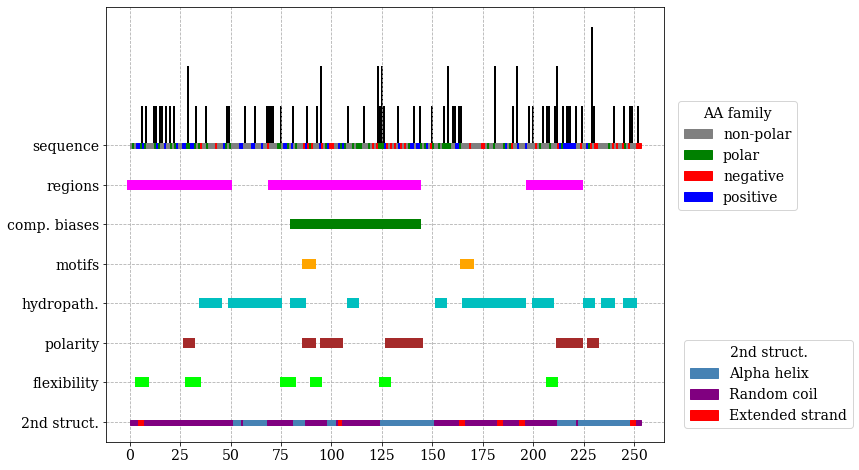

In [35]:
baseline = 0

#families
for i in range(len(seq_list)):
    plt.plot(i+1, baseline, color=fam_polarity_col[seq_list[i]], marker='s', markersize=5)

#regions
plt.plot([1,48], [baseline-1,baseline-1], color='magenta', lw=10)
#plt.text(s='disordered', x=1, y=3)
plt.plot([71,142], [baseline-1,baseline-1], color='magenta', lw=10)
#plt.text(s='disordered', x=71, y=3)
plt.plot([199,222], [baseline-1,baseline-1], color='magenta', lw=10)
#plt.text(s='disordered', x=199, y=3)

#compositional biases
plt.plot([82,103], [baseline-2,baseline-2], color='green', lw=10)
#plt.text(s='Basic and acidic residues', x=82, y=2)
plt.plot([107,122], [baseline-2,baseline-2], color='green', lw=10)
#plt.text(s='Polar residues', x=107, y=2)
plt.plot([125,142], [baseline-2,baseline-2], color='green', lw=10)
#plt.text(s='Basic and acidic residues', x=125, y=2)

#motifs
plt.plot([88,90], [baseline-3,baseline-3], color='orange', lw=10)
#plt.text(s='KEN box', x=88, y=1)
plt.plot([166,168], [baseline-3,baseline-3], color='orange', lw=10)
#plt.text(s='FGF motif', x=166, y=1)

#hydropathicity>0.5
KD_top_ranges = [[37,43],[51,53],[55,57],[60,73],[82,85],[105,105],[110,111],[152,152],[154,155],[167,175],
[177,177],[179,188],[191,194],[197,197],[202,203],[205,208],[225,225],[227,228],[233,233],[236,238],[247,249]]
for rng in KD_top_ranges:
    plt.plot(rng, [baseline-4,baseline-4], color='c', lw=10)
    
#polarity>0.5
PO_top_ranges = [[29,30],[88,90],[97,99],[101,103],[129,135],[137,138],[140,143],[214,222],[229,230]]
for rng in PO_top_ranges:
    plt.plot(rng, [baseline-5,baseline-5], color='brown', lw=10)
    
#flexibility>0.5
FL_top_ranges = [[5,7],[30,33],[77,80],[92,93],[126,127],[161,161],[209,210]]
for rng in FL_top_ranges:
    plt.plot(rng, [baseline-6,baseline-6], color='lime', lw=10)
    
#secondary structure
col_dict = {'C':'purple', 'H':'steelblue', 'E':'red'}
for i in range(len(seq2nd)):
    plt.plot(i+1, baseline-7, color=col_dict[str(seq2nd[i])], marker='s', markersize=5)

#mutation landscape
misse = GMs[GMs['Type']=='Substitution - Missense']
plt.bar(misse['Position'], height=misse['Count'], width=1, color='k')

labels = ['sequence','regions','comp. biases','motifs','hydropath.','polarity','flexibility','2nd struct.'][::-1]
plt.xticks([0,25,50,75,100,125,150,175,200,225,250])
plt.yticks(range(baseline-7,baseline+1), labels)#, size='normal')
plt.grid(axis='both', ls='--')

n_p = mpatches.Patch(color='grey', label='non-polar')
pol = mpatches.Patch(color='green', label='polar')
neg = mpatches.Patch(color='r', label='negative')
pos = mpatches.Patch(color='b', label='positive')
leg1 = plt.legend(handles=[n_p, pol, neg, pos], bbox_to_anchor=(1.25, 0.8), title='AA family')
Hh = mpatches.Patch(color='steelblue', label='Alpha helix')
Cc = mpatches.Patch(color='purple', label='Random coil')
Ee = mpatches.Patch(color='r', label='Extended strand')
leg2 = plt.legend(handles=[Hh, Cc, Ee], bbox_to_anchor=(1.35, 0.25), title='2nd struct.')
plt.gca().add_artist(leg1)

plt.show()